In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load the dataset
df = pd.read_csv("Modified_Chocolate_Sales.csv")

In [4]:
# Step 2: Handle missing values (if any)
df = df.dropna()

In [5]:
X = df[['Year', 'Month', 'Product', 'Boxes Shipped']]
y = df['Amount']
categorical_features = ['Product']

# Preprocessing: One-hot encode categorical columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [6]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [7]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
pipeline.fit(X_train, y_train)

c:\Users\divya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product'])])),
                ('regressor', LinearRegression())])

In [8]:
# Step 7: Make predictions
y_pred = pipeline.predict(X_test)


In [9]:

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 655942.66
R² Score: 0.96


<Figure size 1400x600 with 0 Axes>

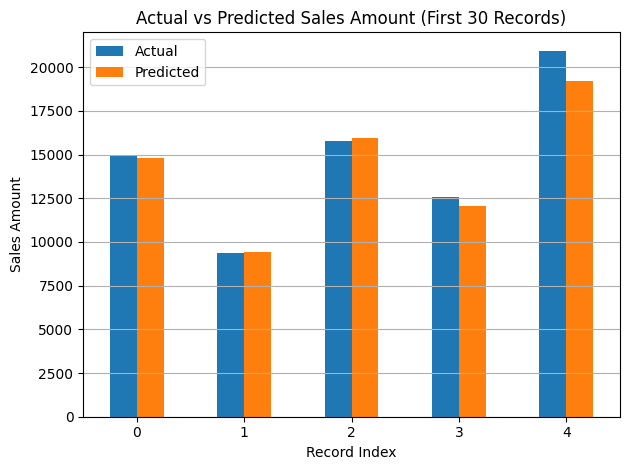

In [10]:
# Step 9: Plot Actual vs Predicted Sales (Bar Plot)
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_df = comparison_df.reset_index(drop=True).head(30)

plt.figure(figsize=(14, 6))
comparison_df.plot(kind='bar')
plt.title('Actual vs Predicted Sales Amount (First 30 Records)')
plt.xlabel('Record Index')
plt.ylabel('Sales Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()